In [0]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import warnings
from skimage.color import rgb2hsv

warnings.filterwarnings('ignore')
%matplotlib inline

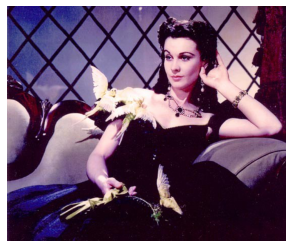

In [2]:
img = imageio.imread('/content/31288513_orig.jpg')
img = img.astype('float32') / 255.

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.show()

Функция преобразования RGB-изображения в HSV по [формулам](https://images.slideplayer.com/19/5768809/slides/slide_26.jpg):

In [0]:
def custom_rgb2hsv(img_rgb):
    R = img_rgb[:, :, 0]
    G = img_rgb[:, :, 1]
    B = img_rgb[:, :, 2]  

    MAX = np.max(img_rgb, axis=2)
    MIN = np.min(img_rgb, axis=2)   

    V = MAX
    S = np.where(MAX == 0, 0, 1 - MIN/MAX)

    H = np.where((MAX == R) & (G >= B) & ~(MAX==MIN), 60*(G-B)/(MAX-MIN)+0, 0) + \
        np.where((MAX == R) & (G < B) & ~(MAX==MIN), 60*(G-B)/(MAX-MIN)+360, 0) + \
        np.where((MAX == G) & ~(MAX==MIN), 60*(B-R)/(MAX-MIN)+120, 0) + \
        np.where((MAX == B) & ~(MAX==MIN), 60*(R-G)/(MAX-MIN)+240, 0)
    H = H / 360.

    img_hsv = np.copy(img_rgb)
    img_hsv[:, :, 0] = H
    img_hsv[:, :, 1] = S
    img_hsv[:, :, 2] = V   

    return img_hsv

Сравним результаты функции из библиотеки *skimage* и функции, приведенной выше:

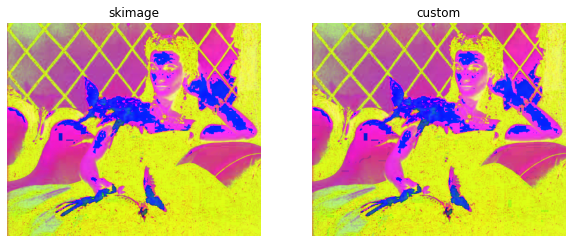

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
for f, f_type, ax in zip([rgb2hsv, custom_rgb2hsv], ['skimage', 'custom'], axes):
    img_hsv = (f(img) * 255)
    ax.imshow(img_hsv.astype('uint8'))
    ax.set_title(f_type)
    ax.set_axis_off()      

Определение границ на изображении:

In [0]:
# grayscaled
img_gray = np.mean(img, axis=2)

In [0]:
# фильтр вертикальных границ
filter_v = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

img_v = np.zeros((img_gray.shape[0] - filter_v.shape[0] + 1,
                  img_gray.shape[1] - filter_v.shape[1] + 1),
                 dtype=np.float32)

for i in range(img_v.shape[0]):
    for j in range(img_v.shape[1]):
        crop = img_gray[i:i+3, j:j+3]
        img_v[i, j] = abs(np.sum(filter_v * crop))


In [0]:
# фильтр горизонтальных границ
filter_h = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

img_h = np.zeros((img_gray.shape[0] - filter_h.shape[0] + 1,
                  img_gray.shape[1] - filter_h.shape[1] + 1),
                 dtype=np.float32)

for i in range(img_h.shape[0]):
    for j in range(img_h.shape[1]):
        crop = img_gray[i:i+3, j:j+3]
        img_h[i, j] = abs(np.sum(filter_h * crop))


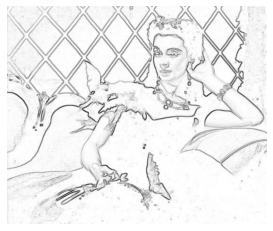

In [11]:
# совмещение границ и обращение цвета
plt.imshow(1 - (img_v + img_h), cmap='gray')
plt.axis('off')
plt.show()